### Disclaimer: The dataset for this project contains text that may be considered profane, vulgar, or offensive. Viewer discretion is advised.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from PIL import Image
from wordcloud import WordCloud

In [2]:
train_df = pd.read_csv('train/train.csv')
test_df = pd.read_csv('test/test.csv')

In [3]:
train_df.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
train_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
cols_target = ["toxic","severe_toxic","obscene","threat","insult","identity_hate"]

In [6]:
null_comments_train = train_df[train_df['comment_text'].isnull()]
print(len(null_comments_train))

0


In [7]:
null_comments_test = test_df[test_df['comment_text'].isnull()]
print(len(null_comments_test))

0


Statistics on lengths of comments
 count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: comment_text, dtype: float64


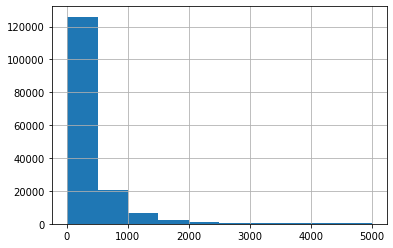

In [8]:
comment_lengths = train_df['comment_text'].str.len()
print('Statistics on lengths of comments\n', comment_lengths.describe())
ax = comment_lengths.hist()

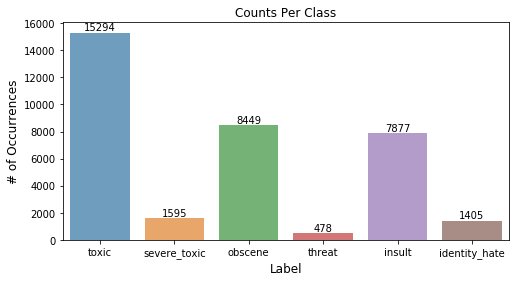

In [9]:
label_counts = train_df[cols_target].sum()
# plotting the label counts
plt.figure(figsize=(8,4))
ax = sns.barplot(label_counts.index, label_counts.values, alpha=0.7)
plt.title("Counts Per Class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Label', fontsize=12)

#adding the text labels
rects = ax.patches
labels = label_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, 
            label, ha='center', va='bottom')

plt.show()

(6.0, 0.0)

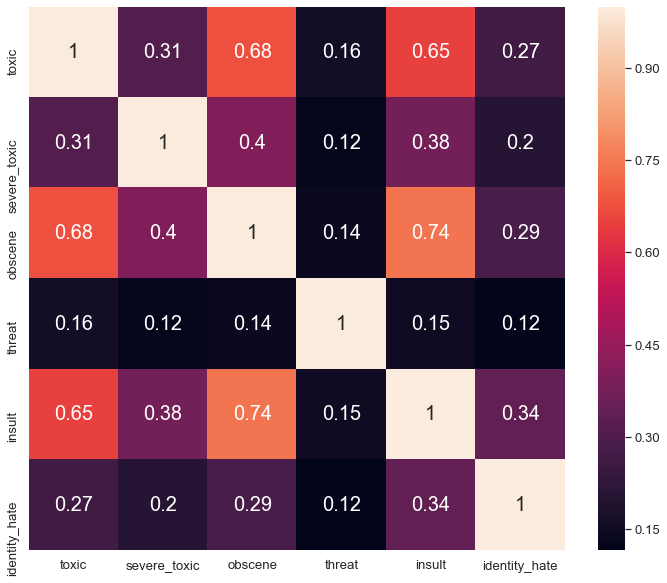

In [10]:
corr=train_df.corr()
plt.figure(figsize=(12,10))
sns.set(font_scale=1.2)
ax = sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot=True, annot_kws={"size": 20})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [11]:
rowsums=train_df.iloc[:,2:].sum(axis=1)
train_df['clean']=(rowsums==0)

In [12]:
#clean comments
clean=train_df[train_df.clean==True]
bag_clean=clean.comment_text.values
#toxic comments
toxic=train_df[train_df.toxic==1]
bag_toxic=toxic.comment_text.values
#sever_toxic comments
severe_toxic=train_df[train_df.severe_toxic==1]
bag_severe_toxic=severe_toxic.comment_text.values
#obscene comments
obscene=train_df[train_df.obscene==1]
bag_obscene=obscene.comment_text.values
#insult comments
insult=train_df[train_df.insult==1]
bag_insult=insult.comment_text.values
#threat comments
threat=train_df[train_df.threat==1]
bag_threat=threat.comment_text.values
#identity_hate comments
identity_hate=train_df[train_df.identity_hate==1]
bag_identity_hate=identity_hate.comment_text.values

bags = ['clean','toxic','severe_toxic','obscene','threat','insult','identity_hate']
data_bag = [bag_clean,bag_toxic,bag_severe_toxic,bag_obscene,bag_threat,bag_insult,bag_identity_hate]

In [13]:
def clouds(index, data):
    bags = ['clean','toxic','severe_toxic','obscene','threat','insult','identity_hate']
    wc= WordCloud(background_color="black",max_words=2000,stopwords="english").generate("".join(data))
    plt.figure(figsize=(10,10))
    plt.axis("off")
    plt.title("Words frequently occurred in %s data"%(bags[index]), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.90)
    plt.show()

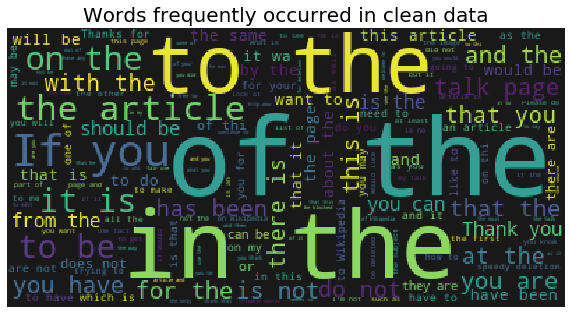

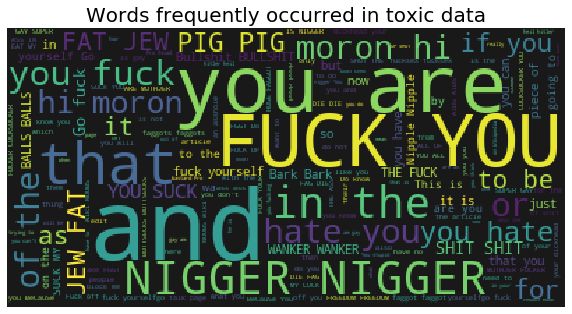

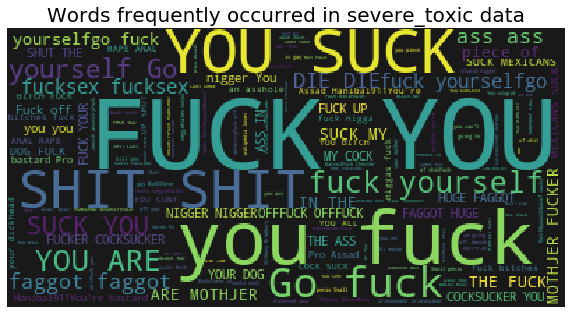

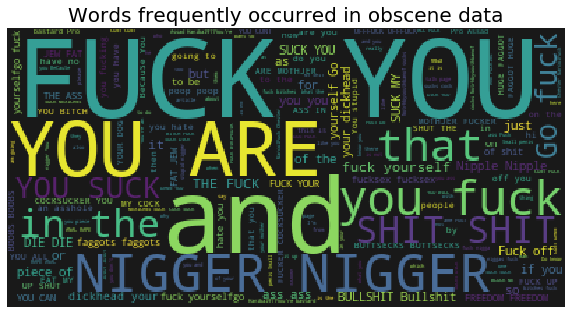

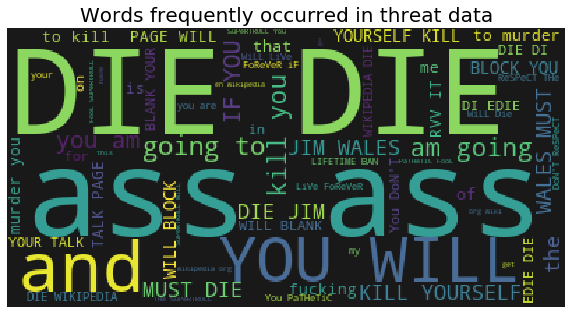

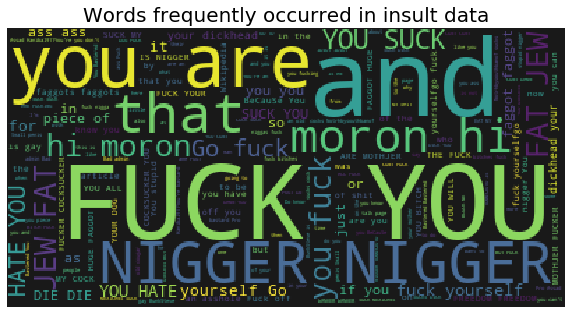

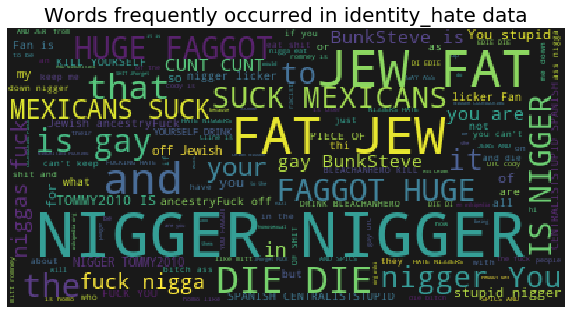

In [14]:
for i, bag in enumerate(data_bag):
    clouds(i, bag)

In [12]:
def clean_text(text):
    text = text.lower()
    text = re.sub("\n"," ",text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [13]:
train_df['comment_text'] = train_df['comment_text'].map(lambda com : clean_text(com))

In [14]:
train_df.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i am s...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i am really not trying to edit war it ...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i cannot make any real suggestions on imp...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_df['comment_text'], train_df[cols_target], test_size=0.2, random_state=2019)
X_test = test_df['comment_text']

tfidf = TfidfVectorizer(ngram_range = (1,2), min_df = 9, strip_accents='unicode', stop_words = 'english')
X_train_tf = tfidf.fit_transform(X_train)
X_val_tf = tfidf.transform(X_val)

X_test_tf = tfidf.transform(X_test)
feature_names = tfidf.get_feature_names()

print('Final Data dimensions after transformations:', X_train_tf.shape, y_train.shape, X_val_tf.shape, y_val.shape)

Final Data dimensions after transformations: (127656, 51242) (127656, 6) (31915, 51242) (31915, 6)


In [20]:
from sklearn.metrics import log_loss, roc_auc_score, accuracy_score

y_train_naive1 = np.random.rand(y_train.shape[0], y_train.shape[1])
print('Baseline 1:', 'Random Guess between 0 and 1')
print('\n')
print("Training Accuracy: ", accuracy_score(y_train, y_train_naive1.round()))
print('Training ROC-AUC score :', roc_auc_score(y_train, y_train_naive1))
print('Training Log Loss:', log_loss(y_train, y_train_naive1))
print('\n')
y_val_naive1 = np.random.rand(y_val.shape[0], y_val.shape[1])
print("Validation Accuracy: ", accuracy_score(y_val, y_val_naive1.round()))
print('Valiation ROC-AUC score :', roc_auc_score(y_val, y_val_naive1))
print('Validation Log Loss:', log_loss(y_val, y_val_naive1))

Baseline 1: Random Guess between 0 and 1


Training Accuracy:  0.015753274425017234
Training ROC-AUC score : 0.5002791024482509
Training Log Loss: 0.4529804256851672


Validation Accuracy:  0.015791947360175466
Valiation ROC-AUC score : 0.502271235043762
Validation Log Loss: 0.4686586845580598


In [22]:
y_train_naive2 = np.zeros(y_train.shape)
print('Baseline 1:', 'Random Guess between 0 and 1')
print('\n')
print("Training Accuracy: ", accuracy_score(y_train, y_train_naive2.round()))
print('Training ROC-AUC score :', roc_auc_score(y_train, y_train_naive2))
print('Training Log Loss:', log_loss(y_train, y_train_naive2))
print('\n')
y_val_naive2 = np.zeros(y_val.shape)
y_val_naive2[:] = 0
print("Validation Accuracy: ", accuracy_score(y_val, y_val_naive2.round()))
print('Valiation ROC-AUC score :', roc_auc_score(y_val, y_val_naive2))
print('Validation Log Loss:', log_loss(y_val, y_val_naive2))

Baseline 1: Random Guess between 0 and 1


Training Accuracy:  0.8988218336780096
Training ROC-AUC score : 0.5
Training Log Loss: 0.3909964555859961


Validation Accuracy:  0.8963183456055146
Valiation ROC-AUC score : 0.5
Validation Log Loss: 0.40652139485133465


In [23]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
model = OneVsRestClassifier(MultinomialNB(), n_jobs = -1)
model.fit(X_train_tf, y_train)
print('model: Naive Bayes')
print('\n')

y_train_pred_nb = model.predict_proba(X_train_tf)
print("Training Accuracy: ", accuracy_score(y_train, y_train_pred_nb.round()))
print('Training ROC-AUC score on validation set:', roc_auc_score(y_train, y_train_pred_nb))
print('Training Log Loss:', log_loss(y_train, y_train_pred_nb))
print('\n')

y_val_pred_nb = model.predict_proba(X_val_tf)
print("Accuracy: ", accuracy_score(y_val, y_val_pred_nb.round()))
print('ROC-AUC score on validation set:', roc_auc_score(y_val, y_val_pred_nb))
print('Log Loss:', log_loss(y_val, y_val_pred_nb))

model: Naive Bayes


Training Accuracy:  0.9120370370370371
Training ROC-AUC score on validation set: 0.944641124243507
Training Log Loss: 0.30893743043255945


Accuracy:  0.9058123139589535
ROC-AUC score on validation set: 0.9050207723525384
Log Loss: 0.34999569563607014


In [24]:
from sklearn.linear_model import LogisticRegression
model = OneVsRestClassifier(LogisticRegression(), n_jobs = -1)
model.fit(X_train_tf, y_train)
print('model: Logistic Regression')
print('\n')

y_train_pred_nb = model.predict_proba(X_train_tf)
print("Training Accuracy: ", accuracy_score(y_train, y_train_pred_nb.round()))
print('Training ROC-AUC score on validation set:', roc_auc_score(y_train, y_train_pred_nb))
print('Training Log Loss:', log_loss(y_train, y_train_pred_nb))
print('\n')

y_val_pred_nb = model.predict_proba(X_val_tf)
print("Accuracy: ", accuracy_score(y_val, y_val_pred_nb.round()))
print('ROC-AUC score on validation set:', roc_auc_score(y_val, y_val_pred_nb))
print('Log Loss:', log_loss(y_val, y_val_pred_nb))

model: Logistic Regression


Training Accuracy:  0.9251347371059723
Training ROC-AUC score on validation set: 0.9911545682136685
Training Log Loss: 0.25638043211413797


Accuracy:  0.9161522794924017
ROC-AUC score on validation set: 0.974510654125746
Log Loss: 0.2913767745089274


In [26]:
from sklearn.ensemble import RandomForestClassifier
model = OneVsRestClassifier(RandomForestClassifier(), n_jobs = -1)
print('model: Random Forest')
model.fit(X_train_tf, y_train)
print('\n')

y_train_pred_nb = model.predict_proba(X_train_tf)
print("Training Accuracy: ", accuracy_score(y_train, y_train_pred_nb.round()))
print('Training ROC-AUC score on validation set:', roc_auc_score(y_train, y_train_pred_nb))
print('Training Log Loss:', log_loss(y_train, y_train_pred_nb))
print('\n')

y_val_pred_nb = model.predict_proba(X_val_tf)
print("Accuracy: ", accuracy_score(y_val, y_val_pred_nb.round()))
print('ROC-AUC score on validation set:', roc_auc_score(y_val, y_val_pred_nb))
print('Log Loss:', log_loss(y_val, y_val_pred_nb))

model: Random Forest


Training Accuracy:  0.9866986275615717
Training ROC-AUC score on validation set: 0.9998301233032918
Training Log Loss: 0.2128378746213223


Accuracy:  0.9091963026789911
ROC-AUC score on validation set: 0.873947186999505
Log Loss: 0.7676343510198936


In [27]:
embed_size = 50 # how big is each word vector
max_features = 50000 # how many unique words to use (i.e num rows in embedding vector)
maxlen = 100 # max number of words in a comment to use

In [33]:
import sys, os, re, csv, codecs

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
import tensorflow as tf

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(train_df['comment_text'])
list_tokenized_train = tokenizer.texts_to_sequences(train_df['comment_text'])
list_tokenized_test = tokenizer.texts_to_sequences(test_df['comment_text'])
Xtr = pad_sequences(list_tokenized_train, maxlen=maxlen)
Xte = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [34]:
def get_coefs(word,*arr): 
    return word, np.asarray(arr, dtype='float32')

embeddings_index = dict(get_coefs(*o.strip().split()) for o in open(f'..\Downloads\8542_11957_bundle_archive\glove.6B.50d.txt', encoding="utf8"))

In [35]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
emb_mean,emb_std

C:\Users\mehul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """Entry point for launching an IPython kernel.


(0.020940498, 0.6441043)

In [36]:
word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

In [41]:
from keras import backend as K
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [47]:
inp = Input(shape=(maxlen,))
x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
x = Bidirectional(LSTM(50, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
x = GlobalMaxPool1D()(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', auc])

In [48]:
model.fit(Xtr, train_df[cols_target], batch_size=32, epochs=5, validation_split=0.2)

Train on 127656 samples, validate on 31915 samples
Epoch 1/5
127656/127656 [==============================] - 678s 5ms/step - loss: 0.0619 - accuracy: 0.9784 - auc: 0.9290 - val_loss: 0.0478 - val_accuracy: 0.9820 - val_auc: 0.9707
Epoch 2/5
127656/127656 [==============================] - 762s 6ms/step - loss: 0.0444 - accuracy: 0.9830 - auc: 0.9755 - val_loss: 0.0449 - val_accuracy: 0.9832 - val_auc: 0.9784
Epoch 3/5
127656/127656 [==============================] - 801s 6ms/step - loss: 0.0391 - accuracy: 0.9847 - auc: 0.9804 - val_loss: 0.0462 - val_accuracy: 0.9827 - val_auc: 0.9817
Epoch 4/5
127656/127656 [==============================] - 720s 6ms/step - loss: 0.0350 - accuracy: 0.9861 - auc: 0.9829 - val_loss: 0.0475 - val_accuracy: 0.9833 - val_auc: 0.9836
Epoch 5/5
127656/127656 [==============================] - 795s 6ms/step - loss: 0.0318 - accuracy: 0.9871 - auc: 0.9843 - val_loss: 0.0483 - val_accuracy: 0.9828 - val_auc: 0.9849


In [49]:
y_pred = model.predict([Xte], batch_size=1024, verbose=1)

153164/153164 [==============================] - 75s 488us/step


In [50]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission[cols_target] = y_pred
sample_submission.to_csv('submission.csv', index=False)